#### Lab 1 - Python fundamentals

**Purspose**<br>
To use to use fundamentals of python to transform raw data to representable format.<br>
More specifically, you will perform a step in decoding DNA data.<br> This can be a common topic for a
data analyst or data scientist in a medtech company.<br> 
You do not need prior knowledge about DNA for this lab.


First look at the dna_raw.txt

In [ ]:
# read in the text-file
# reference : kokchun video about file handling https://www.youtube.com/watch?v=NY6C8_xCi1w

data_path = "raw_data" # raw_data is my folder there i store raw-data(not cleaned data)

path = f"{data_path}/dna_raw.txt"

with open(path, "r") as file:
    dna_raw = file.read()

print(dna_raw) # when you print out like this, text will be displayed same as when you  open the file in a text editor

In [18]:
type(dna_raw) # this show what datatype.

str

Since this is a "str" we can apply string methods

In [19]:
dna_raw

'>seq1\ncGTAaccaataaaaaaacaagcttaacctaattc\n>seq2\nagcttagTTTGGatctggccgggg\n>seq3\ngcggatttactcCCCCCAAAAANNaggggagagcccagataaatggagtctgtgcgtccaca\n>seq4\ngcggatttactcaggggagagcccagGGataaatggagtctgtgcgtccaca\n'

#### cleaning
- inspect txt-file
- remove newlines
- make string to lowercase
- lägg till mer vad jag har gjort

In [ ]:
# import regex
import re

In [ ]:
with open(path, "r") as f_read, open("clean_data/raw_data_cleaned.txt", "w") as f_write:
    for raw_d in f_read:
        raw_d = raw_d.strip("\n")
        raw_d = re.sub(">seq1", "<seg1>", raw_d)
        raw_d = re.sub(">seq2", "<seq2>", raw_d)
        raw_d = re.sub(">seq3", "<seq3>", raw_d)
        raw_d = re.sub(">seq4", "<seq4>", raw_d)
        raw_d = raw_d.lower()
        print(raw_d)

        f_write.write(f"{raw_d}")

In [ ]:
# source stackoverflow: https://stackoverflow.com/questions/8369219/how-can-i-read-a-text-file-into-a-string-variable-and-strip-newlines

raw_data_as_string = open('raw_data/raw_data_cleaned.txt', 'r').read()

raw_data_as_string

'<seg1>cgtaaccaataaaaaaacaagcttaacctaattc<seq2>agcttagtttggatctggccgggg<seq3>gcggatttactccccccaaaaannaggggagagcccagataaatggagtctgtgcgtccaca<seq4>gcggatttactcaggggagagcccagggataaatggagtctgtgcgtccaca'

In [56]:
len(raw_data_as_string)

196

split each sequnce in strings by slicing

In [ ]:
sequnce_1 = raw_data_as_string[6:40] 
sequnce_1

sequnce_2 = raw_data_as_string[46:70]
sequnce_2

sequnce_3 = raw_data_as_string[76:138]
sequnce_3

sequnce_4 = raw_data_as_string[144:196]
sequnce_4



agcttagtttggatctggccgggg


count each dna for every sequnce

In [ ]:
# find out unique values in sequence_1
set(sequnce_1)

{'a', 'c', 'g', 't'}

In [91]:
# source: https://www.digitalocean.com/community/tutorials/python-add-to-dictionary#adding-to-a-dictionary-using-the-update-operator
# source: https://realpython.com/sort-python-dictionary/ 

# create counter for each dna group, to count them.
a_counter = 0
c_counter = 0
g_counter = 0
t_counter = 0

dna_sequnce_1 = {} ## creating an empty dictionary to store dna.

## loop through each sequnce and add them to the dictionary
for dna in sequnce_1:
    if dna == "a":
        a_counter +=1
        dna_sequnce_1[dna] = a_counter
    elif dna == "c":
        c_counter +=1
        dna_sequnce_1[dna] = c_counter
    elif dna == "g":
        g_counter +=1
        dna_sequnce_1[dna] = g_counter
    elif dna == "t":
        t_counter +=1
        dna_sequnce_1[dna] = t_counter


# sort the dictionary by value 
dict(sorted(dna_sequnce_1.items(), key=lambda item: item[1]))


{'g': 2, 't': 7, 'c': 8, 'a': 17}

<function matplotlib.pyplot.show(close=None, block=None)>

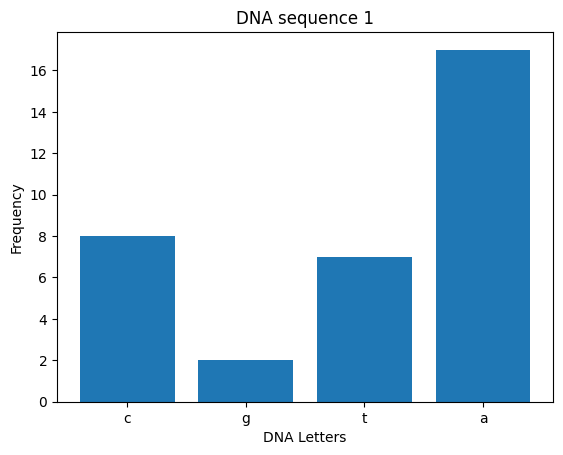

In [ ]:
# source https://www.w3schools.com/python/matplotlib_bars.asp
# source https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
# source https://www.w3schools.com/python/matplotlib_labels.asp
# source https://www.datacamp.com/tutorial/python-bar-plot

import matplotlib.pyplot as plt

plt.bar(dna_sequnce_1.keys(), dna_sequnce_1.values())
plt.title("DNA sequence 1")
plt.ylabel("Frequency")
plt.xlabel("DNA Letters")
plt.show